# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [6]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:

data = pd.read_csv('../data/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
# Your code here:
data.dtypes #All variables are integers

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
data.isnull().sum() # No nulls

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [45]:
data.describe() #Summary of the different variables

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,pareto,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,51.971959,33226.136364
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,28.440303,26356.301730
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.239937,904.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,26.884058,17448.750000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,51.111866,27492.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,77.854044,41307.500000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,100.000000,199891.000000


Text(0.5, 1, 'Correlation between variables of the Dataset')

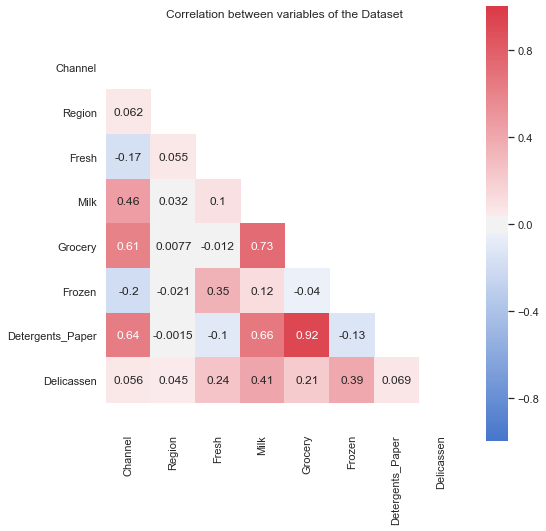

In [7]:
# Correlation between variables

# Correlation Matrix Heatmap Visualization
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(8,8))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(data.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
ax.set_title('Correlation between variables of the Dataset')

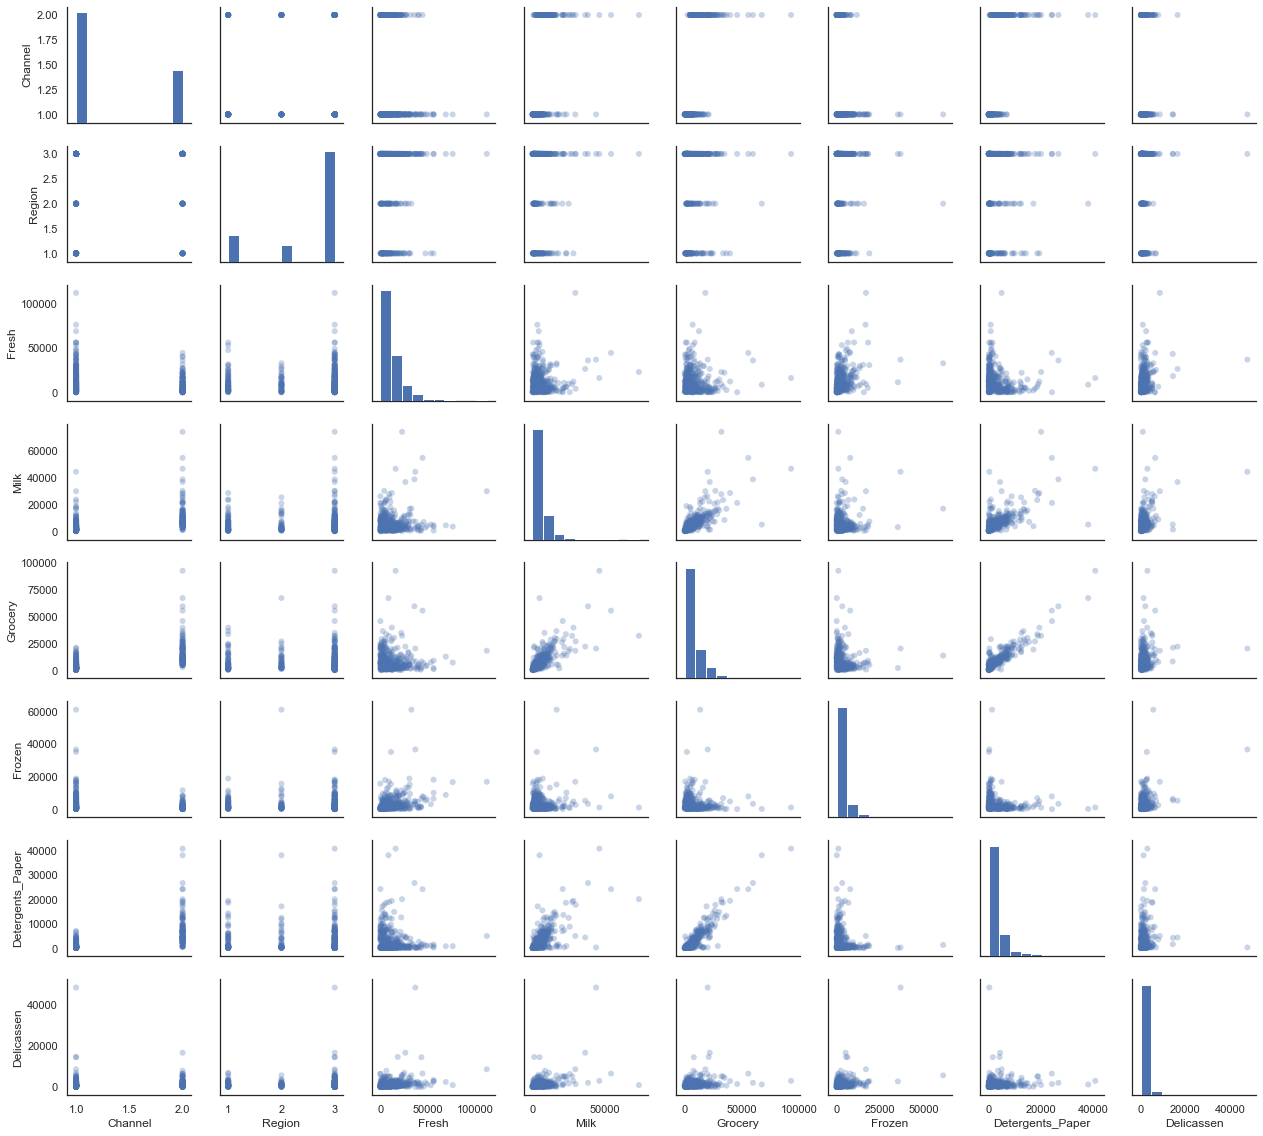

In [8]:
# Distribution of variables

sns.pairplot(data, plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

In [26]:
data['Region'].value_counts(normalize=True)

3    0.718182
1    0.175000
2    0.106818
Name: Region, dtype: float64

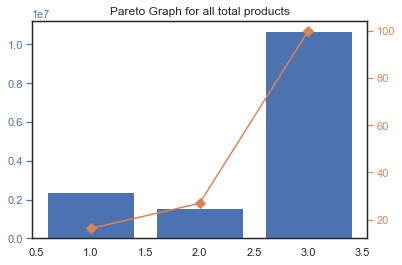

In [44]:
### BONUS: Pareto Distribution of the Total Products by Region ###

pareto_df = data
pareto_df['Total'] = pareto_df['Fresh'] + pareto_df['Milk'] + pareto_df['Grocery'] +pareto_df['Frozen'] + pareto_df['Detergents_Paper'] + pareto_df['Delicassen']
grouped_pareto = pareto_df.groupby(['Region'])['Total'].sum().reset_index()
grouped_pareto["cumpercentage"] = grouped_pareto["Total"].cumsum()/grouped_pareto["Total"].sum()*100


fig, ax = plt.subplots()
ax.bar(grouped_pareto['Region'], grouped_pareto["Total"], color="C0")
ax2 = ax.twinx()
ax2.plot(grouped_pareto['Region'], grouped_pareto["cumpercentage"], color="C1", marker="D", ms=7)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title('Pareto Graph for all total products')
plt.show()

In [ ]:
# Your observations here

# What does each column mean?
'''
FRESH: annual spending (m.u.) on fresh products (Continuous);
MILK: annual spending (m.u.) on milk products (Continuous);
GROCERY: annual spending (m.u.)on grocery products (Continuous);
FROZEN: annual spending (m.u.)on frozen products (Continuous)
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
CHANNEL: customer Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal)
REGION: customers Region - Lisnon, Oporto or Other (Nominal)
'''
# Any categorical data to convert?
    # There are no categorical data to convert
    
# Any missing data to remove?
    # There are no missing values to remove
    
# Column collinearity - any high correlations?
    # There are high collinearity between Grocery and Detergent_Paper.
    
# Descriptive statistics - any outliers to remove?
    # Aparently there are no outliers to remove
    
# Column-wise data distribution - is the distribution skewed?
    # The distribution seems skewed to the left side, following an aparently exponential distribution.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Althought the dataset seems ready for analysis, the different colums has to be scalled to be comparable between them.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [54]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
customer_scale = StandardScaler().fit_transform(data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [57]:
# Your code here:
from sklearn.cluster import KMeans

km = KMeans().fit(customer_scale)
data['labels'] = km.labels_

Count the values in `labels`.

In [58]:
# Your code here:
data['labels'].value_counts()

2    237
0    105
5     58
4     28
1      5
3      4
6      2
7      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [103]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan_05 = DBSCAN(eps=0.5).fit(customer_scale)
data['labels_DBSCAN'] = dbscan_05.labels_

Count the values in `labels_DBSCAN`.

In [60]:
# Your code here
data['labels_DBSCAN'].value_counts()

 0    261
-1    174
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

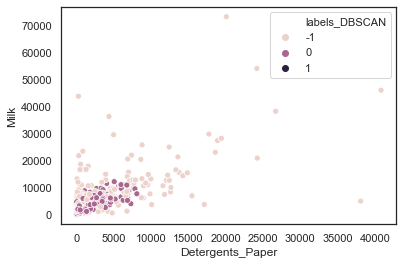

In [71]:
# Your code here:
sns.scatterplot(data=data, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

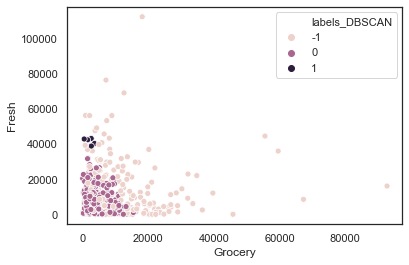

In [72]:
# Your code here:
sns.scatterplot(data=data, x='Grocery', y='Fresh', hue='labels_DBSCAN')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

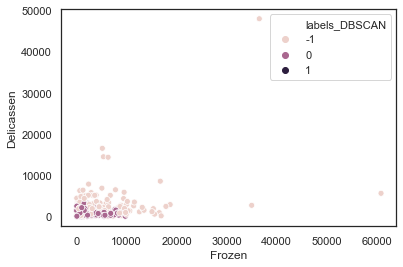

In [73]:
# Your code here:

sns.scatterplot(data=data, x='Frozen', y='Delicassen', hue='labels_DBSCAN')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [75]:
# Your code here:
grouped_kmeans = data.groupby(['labels'])['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'].mean()
grouped_kmeans

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
0,5899.923810,8531.971429,12306.114286,1495.419048,4917.742857,1533.466667
1,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000
2,9015.822785,2463.160338,3143.291139,2735.801688,704.329114,928.004219
3,50020.000000,18085.250000,17331.500000,8396.000000,3759.250000,13474.000000
4,5614.392857,16373.428571,26456.392857,1721.428571,13238.321429,2040.285714
5,33753.672414,4462.189655,5312.689655,5497.758621,817.327586,1882.310345
6,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.500000
7,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000


In [76]:
grouped_dbscan = data.groupby(['labels_DBSCAN'])['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'].mean()
grouped_dbscan

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,
-1,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609
0,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946
1,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# DBSCAN seems to perform better.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

<function matplotlib.pyplot.show(*args, **kw)>

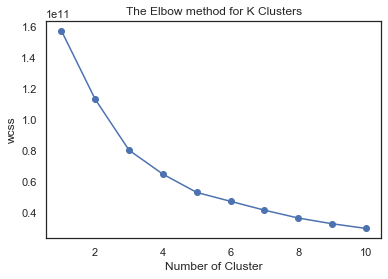

In [87]:
# Your code here

X = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, marker="o")
plt.title('The Elbow method for K Clusters')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show

In [ ]:
# Your comment here

In [ ]:
### The optimal number of clusters seems to be 3.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

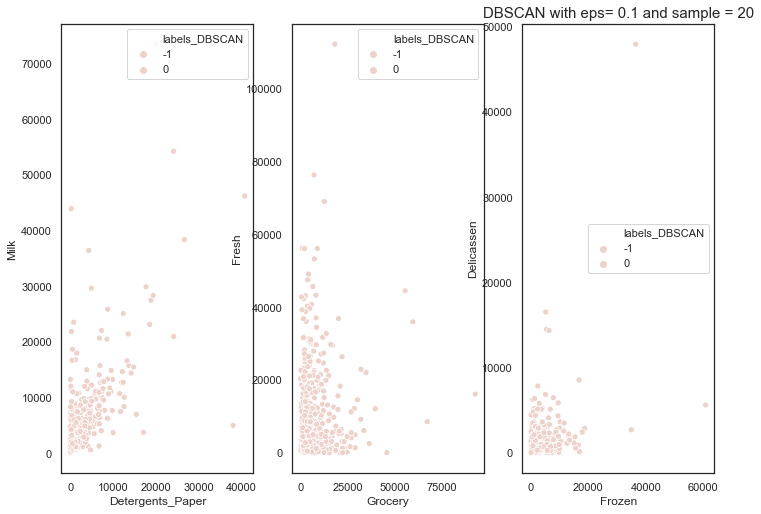

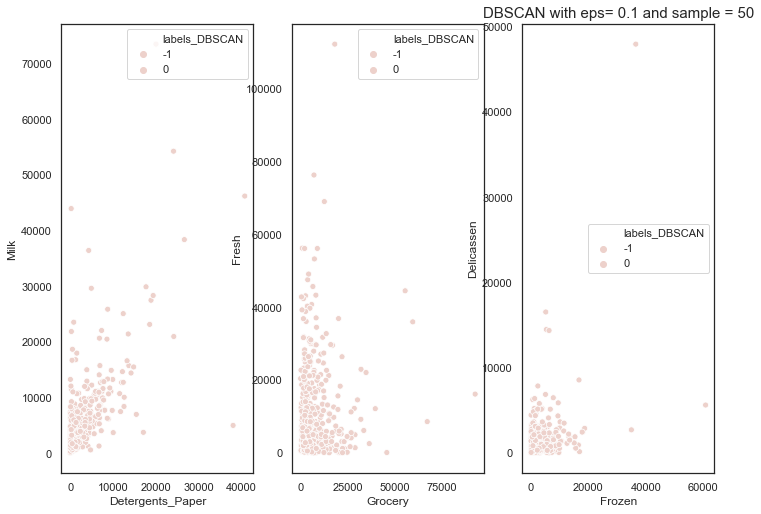

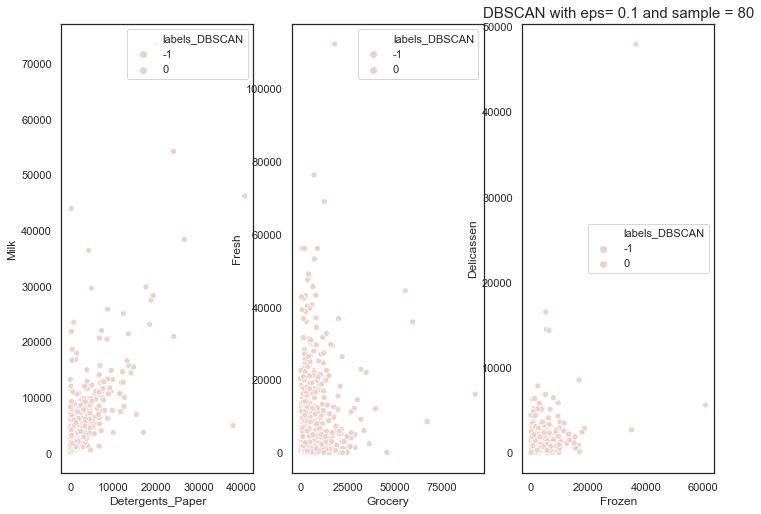

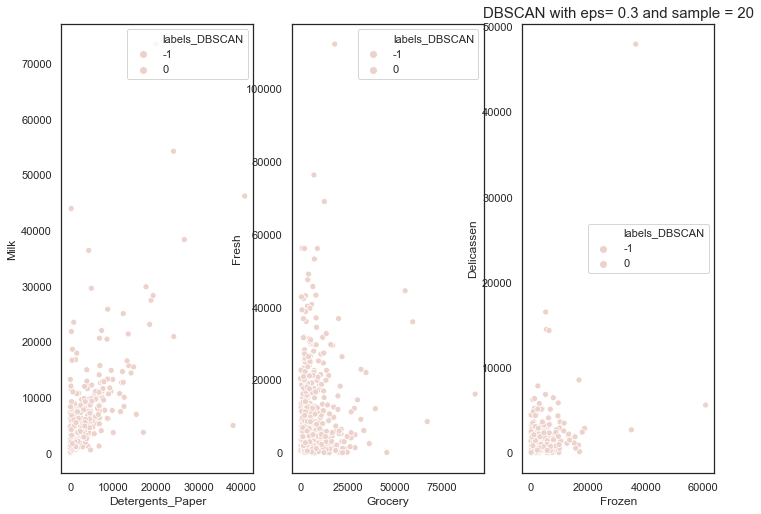

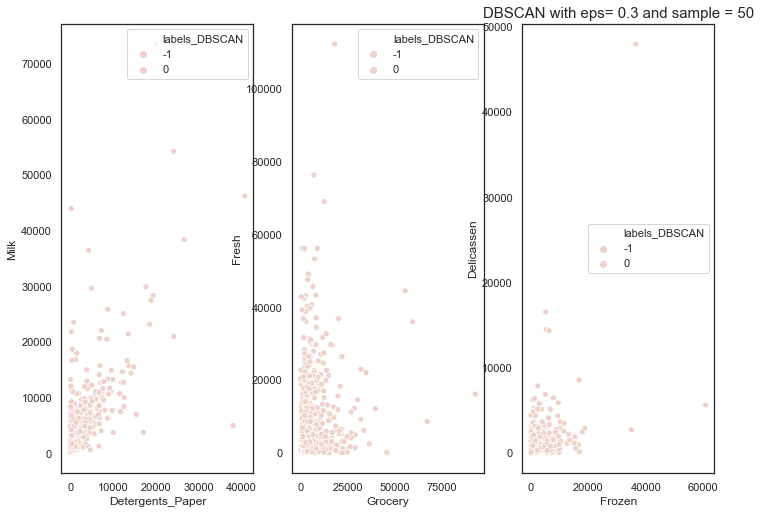

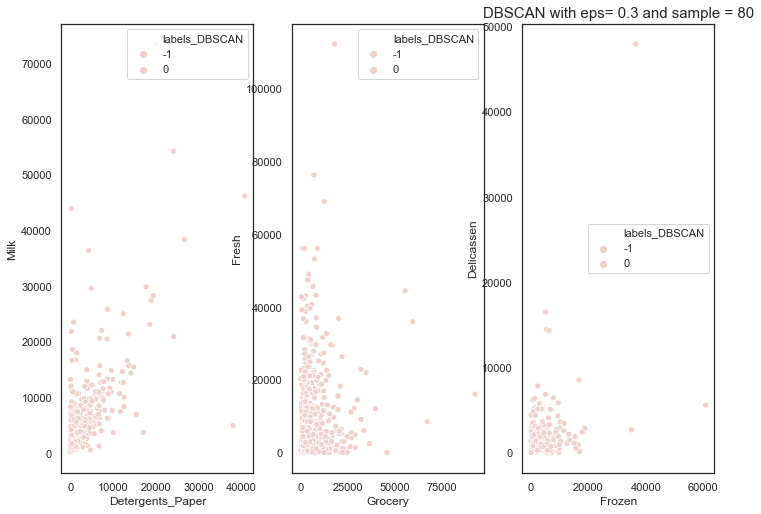

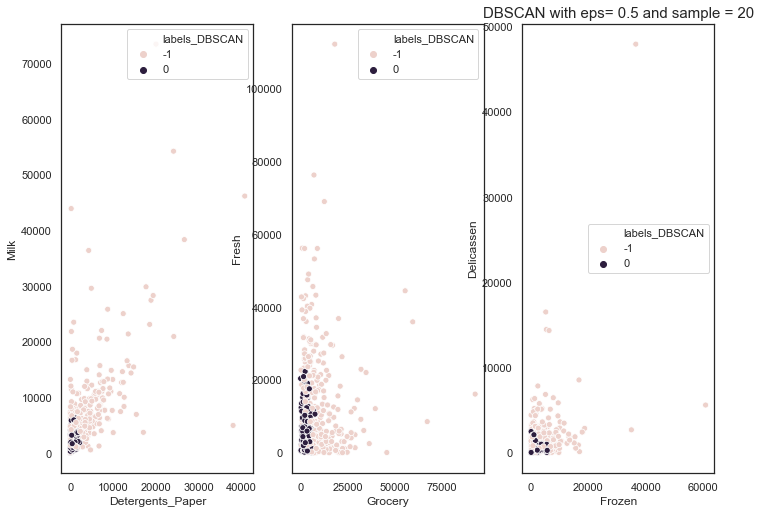

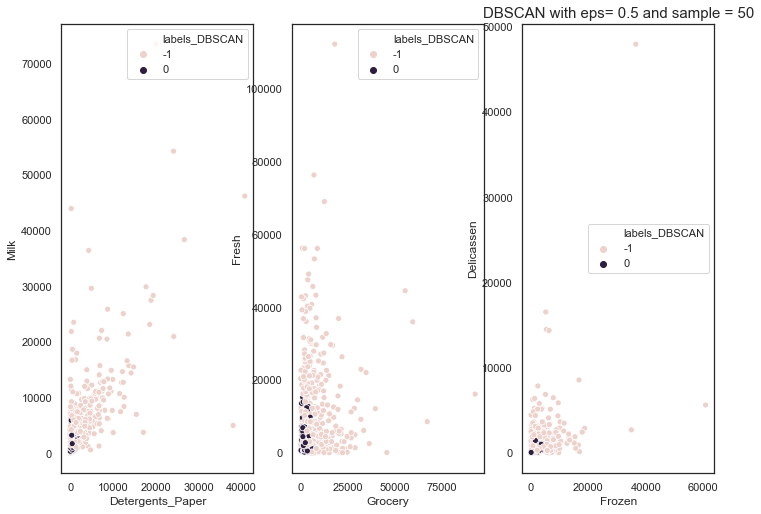

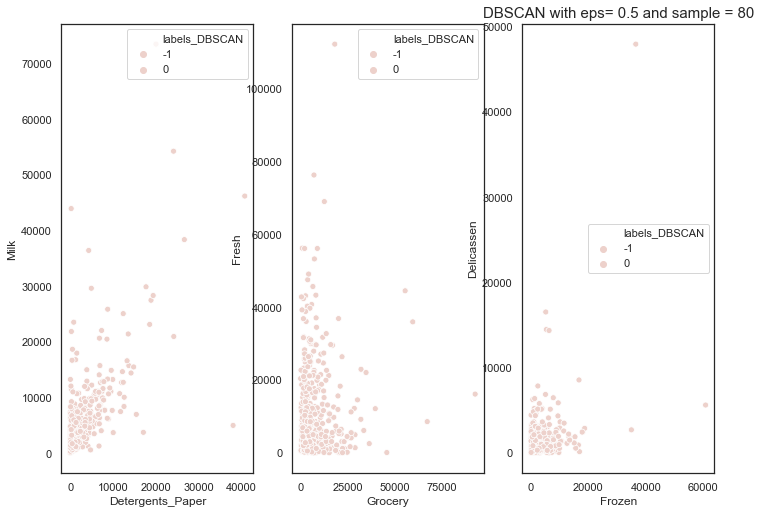

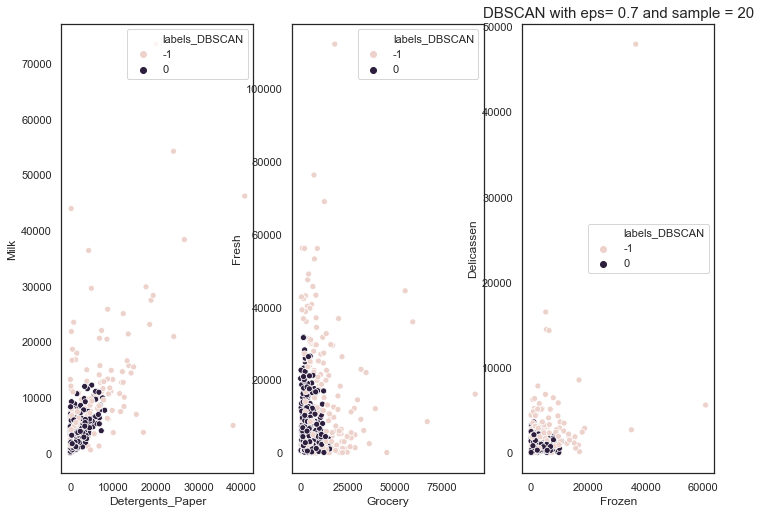

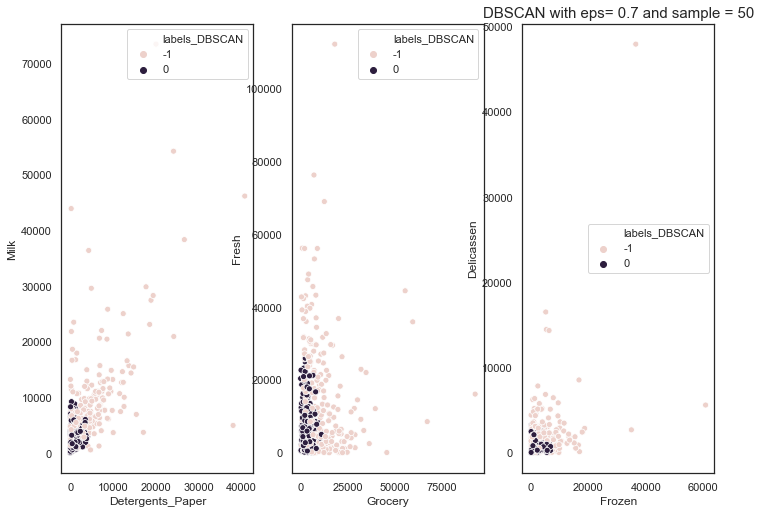

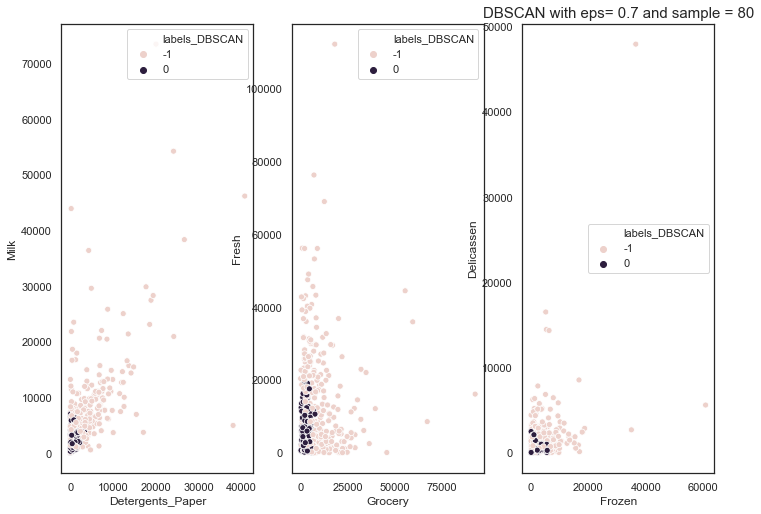

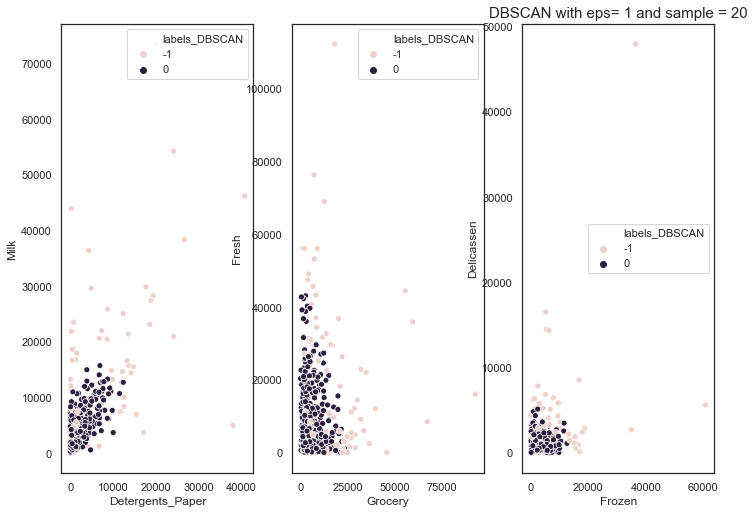

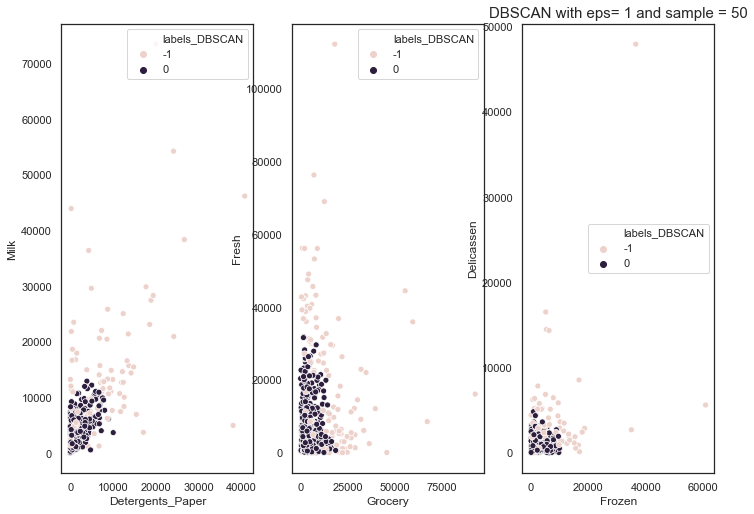

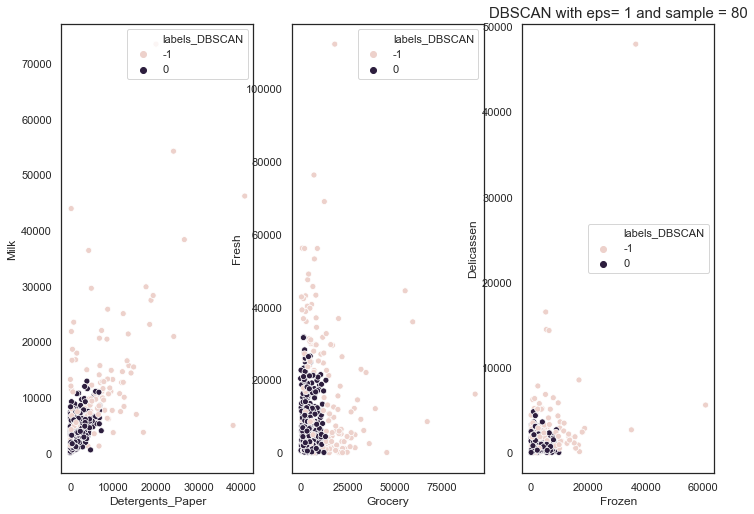

In [111]:
# Your code here
eps = [0.1, 0.3, 0.5, 0.7, 1]
min_samples = [20, 50, 80]
plt.rcParams['figure.figsize'] = 11.7,8.27


for e in eps:
    for sample in min_samples:
        dbscan = DBSCAN(eps=e, min_samples=sample).fit(customer_scale)
        data['labels_DBSCAN'] = dbscan.labels_
        fig, ax = plt.subplots(ncols=3)
        plt.title('DBSCAN with eps= ' + str(e)+ ' and sample = ' + str(sample), size= 15)
        sns.scatterplot(data=data, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', ax=ax[0])
        sns.scatterplot(data=data, x='Grocery', y='Fresh', hue='labels_DBSCAN', ax=ax[1])
        sns.scatterplot(data=data, x='Frozen', y='Delicassen', hue='labels_DBSCAN', ax=ax[2])
        
        

In [ ]:
# Your comment here

# Changing the parameters affects how the different points are labeled in different clusters.
# eps seems to be the most important parameter to "tune" when doing a DBSCAN clustering.